In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
files = []
for i in range(1,11):
    files.append(f'{i}_pred.txt')

#c_names = ['index','gold','pred','correct','text']
c_names = ['gold','pred','correct','text']

df1 = pd.DataFrame(columns=c_names)
df2 = pd.DataFrame(columns=c_names)
df3 = pd.DataFrame(columns=c_names)
df4 = pd.DataFrame(columns=c_names)
df5 = pd.DataFrame(columns=c_names)
df6 = pd.DataFrame(columns=c_names)
df7 = pd.DataFrame(columns=c_names)
df8 = pd.DataFrame(columns=c_names)
df9 = pd.DataFrame(columns=c_names)
df10 = pd.DataFrame(columns=c_names)

dataframes = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
j = 0
for dataframe in dataframes:
    
    #dataframe = pd.DataFrame(columns=['index','gold','pred','correct','text'])
    processed_lines = []

    with open(files[j], 'r') as f:
        lines = f.readlines()

        count = 0
        for line in lines[1:]:
            tokens = line.split()
            line_length = len(tokens)
            temp_line = ''

            for i in range(4, (line_length)):
                temp_line = temp_line + tokens[i] + ' '
                
            processed_line = [tokens[1],tokens[2],tokens[3], temp_line]
            processed_lines.append(processed_line)
            dataframe.loc[count] = processed_line
            count+=1
    j+=1

In [39]:
def get_f1(dataframe):
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    corrects = 0
    errors = []
    for i in range(0,len(dataframe)):
        if dataframe.iat[i,2] == 'yes':
            corrects += 1
        else:
            errors.append(i)
        if (dataframe.iat[i,0] == 'pos' and dataframe.iat[i,1] == 'pos'):
            true_pos += 1
        elif (dataframe.iat[i,0] == 'pos' and dataframe.iat[i,1] == 'neg'):
            false_neg += 1
        elif (dataframe.iat[i,0] == 'neg' and dataframe.iat[i,1] == 'neg'):
            true_neg += 1
        elif (dataframe.iat[i,0] == 'neg' and dataframe.iat[i,1] == 'pos'):
            false_pos += 1
    
    accuracy = corrects/len(dataframe)
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    f1_score = 2*((precision*recall)/(precision + recall))
    return(accuracy,precision,recall,f1_score,errors)

In [40]:
all_f1 = []
for i, dataframe in enumerate(dataframes):
    scores = get_f1(dataframe)
    all_f1.append(scores[3])
    print(f'Cross validation {i+1}')
    print(f'The accuracy is {scores[0]*100:.2f}%')
    print(f'The precision is {scores[1]*100:.2f}%')
    print(f'The recall is {scores[2]*100:.2f}%')
    print(f'The F1 score is {scores[3]*100:.2f}%')
    print(f'The model got the following rows wrong {scores[4]}\n')

Cross validation 1
The accuracy is 90.00%
The precision is 87.04%
The recall is 94.00%
The F1 score is 90.38%
The model got the following rows wrong [1, 10, 44, 50, 82, 91, 108, 113, 117, 118, 124, 128, 129, 134, 135, 157, 171, 177, 197, 198]

Cross validation 2
The accuracy is 87.50%
The precision is 85.71%
The recall is 90.00%
The F1 score is 87.80%
The model got the following rows wrong [9, 14, 18, 50, 59, 62, 65, 78, 93, 94, 104, 105, 115, 118, 125, 137, 140, 142, 143, 146, 162, 167, 170, 177, 189]

Cross validation 3
The accuracy is 95.00%
The precision is 93.27%
The recall is 97.00%
The F1 score is 95.10%
The model got the following rows wrong [8, 44, 99, 100, 133, 142, 156, 162, 178, 196]

Cross validation 4
The accuracy is 91.00%
The precision is 90.20%
The recall is 92.00%
The F1 score is 91.09%
The model got the following rows wrong [14, 31, 36, 54, 83, 92, 94, 98, 105, 108, 109, 120, 153, 159, 161, 168, 181, 185]

Cross validation 5
The accuracy is 85.00%
The precision is 88

In [32]:
sum(all_f1)/len(all_f1)

0.8930670404946724

## Naive Bayes Baseline

Evaluating fold 1 of 10
Accuracy --> 0.795
Precision --> 0.82
Recall --> 0.780952380952381
F1 --> 0.8

Evaluating fold 2 of 10
Accuracy --> 0.84
Precision --> 0.89
Recall --> 0.8090909090909091
F1 --> 0.8476190476190476

Evaluating fold 3 of 10
Accuracy --> 0.84
Precision --> 0.86
Recall --> 0.8269230769230769
F1 --> 0.8431372549019608

Evaluating fold 4 of 10
Accuracy --> 0.825
Precision --> 0.84
Recall --> 0.8155339805825242
F1 --> 0.8275862068965517

Evaluating fold 5 of 10
Accuracy --> 0.835
Precision --> 0.85
Recall --> 0.8252427184466019
F1 --> 0.8374384236453202

Evaluating fold 6 of 10
Accuracy --> 0.83
Precision --> 0.84
Recall --> 0.8235294117647058
F1 --> 0.8316831683168315

Evaluating fold 7 of 10
Accuracy --> 0.84
Precision --> 0.87
Recall --> 0.8207547169811321
F1 --> 0.8446601941747572

Evaluating fold 8 of 10
Accuracy --> 0.845
Precision --> 0.89
Recall --> 0.8165137614678899
F1 --> 0.8516746411483254

Evaluating fold 9 of 10
Accuracy --> 0.785
Precision --> 0.83
Recall --> 0.7614678899082569
F1 --> 0.7942583732057417

Evaluating fold 10 of 10
Accuracy --> 0.855
Precision --> 0.92
Recall --> 0.8141592920353983
F1 --> 0.863849765258216

## LR Baseline

Evaluating fold 1 of 10
Accuracy --> 0.845
Precision --> 0.84
Recall --> 0.8484848484848485
F1 --> 0.8442211055276383

Evaluating fold 2 of 10
Accuracy --> 0.875
Precision --> 0.9
Recall --> 0.8571428571428571
F1 --> 0.8780487804878048

Evaluating fold 3 of 10
Accuracy --> 0.845
Precision --> 0.87
Recall --> 0.8285714285714286
F1 --> 0.848780487804878

Evaluating fold 4 of 10
Accuracy --> 0.86
Precision --> 0.84
Recall --> 0.875
F1 --> 0.8571428571428572

Evaluating fold 5 of 10
Accuracy --> 0.855
Precision --> 0.84
Recall --> 0.865979381443299
F1 --> 0.8527918781725888

Evaluating fold 6 of 10
Accuracy --> 0.875
Precision --> 0.91
Recall --> 0.8504672897196262
F1 --> 0.8792270531400966

Evaluating fold 7 of 10
Accuracy --> 0.865
Precision --> 0.84
Recall --> 0.8842105263157894
F1 --> 0.8615384615384616

Evaluating fold 8 of 10
Accuracy --> 0.885
Precision --> 0.88
Recall --> 0.8888888888888888
F1 --> 0.8844221105527638

Evaluating fold 9 of 10
Accuracy --> 0.84
Precision --> 0.89
Recall --> 0.8090909090909091
F1 --> 0.8476190476190476

Evaluating fold 10 of 10
Accuracy --> 0.915
Precision --> 0.94
Recall --> 0.8952380952380953
F1 --> 0.9170731707317075

(0.8670864952717844, 0.021568042840638336, 0.8442211055276383, 0.9170731707317075)

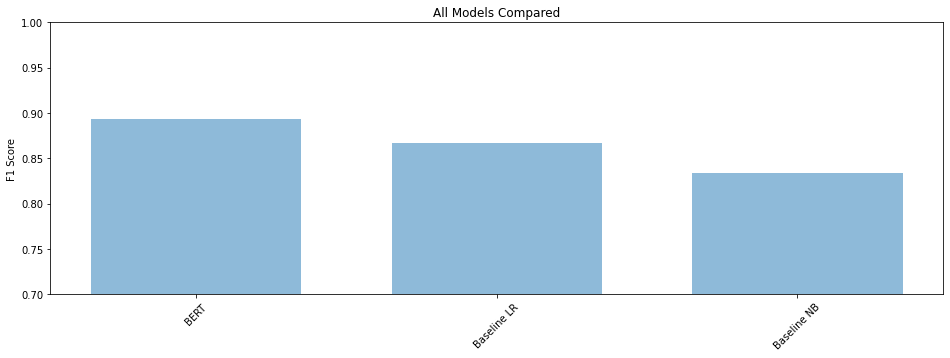

In [19]:
objects = ['Baseline NB', 'Baseline LR', 'BERT']
y_pos = np.arange(len(objects))
performance = [0.83419,0.86704,0.89306]
objects = [x for _,x in sorted(zip(performance,objects),reverse=True)]
performance = [x for x,_ in sorted(zip(performance,objects),reverse=True)]
plt.figure(figsize=(16, 5))
plt.bar(y_pos, performance, align='center', alpha=0.5, width=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score')
plt.title('All Models Compared')
plt.ylim([0.7, 1])
plt.xticks(rotation=45)
plt.show()